In [1]:
# Define train_values_url
train_values_url <- "http://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv"

# Import train_values
train_values <- read.csv(train_values_url)

# Define train_labels_url
train_labels_url <- "http://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv"

# Import train_labels
train_labels <- read.csv(train_labels_url)

test_values_url <- "http://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv"

# Import test_values
test_values <- read.csv(test_values_url)


In [2]:
# Merge data frames to create the data frame train
train <- merge(train_labels, train_values)


In [3]:
head(train)

id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,⋯,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,non functional,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,⋯,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,functional,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,⋯,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,functional,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,⋯,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
3,functional,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,⋯,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,non functional,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,⋯,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump
5,functional,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,⋯,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [4]:
# Look at the number of pumps in each functional status group
table(train$status_group)


             functional functional needs repair          non functional 
                  32259                    4317                   22824 

In [5]:
# As proportions
prop.table(table(train$status_group))


             functional functional needs repair          non functional 
             0.54308081              0.07267677              0.38424242 

In [6]:
# Table of the quantity variable vs the status of the pumps
table(train$quantity, train$status_group)


              
               functional functional needs repair non functional
  dry                 157                      37           6052
  enough            21648                    2400           9138
  insufficient       7916                    1450           5763
  seasonal           2325                     416           1309
  unknown             213                      14            562

In [7]:
# As row-wise proportions, quantity vs status_group
prop.table(table(train$quantity, train$status_group), margin = 1)

              
                functional functional needs repair non functional
  dry          0.025136087             0.005923791    0.968940122
  enough       0.652323269             0.072319653    0.275357078
  insufficient 0.523233525             0.095842422    0.380924053
  seasonal     0.574074074             0.102716049    0.323209877
  unknown      0.269961977             0.017743980    0.712294043

In [8]:
#Load the ggplot package and examine train
library(ggplot2)
str(train)

'data.frame':	59400 obs. of  41 variables:
 $ id                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ status_group         : Factor w/ 3 levels "functional","functional needs repair",..: 3 1 1 1 3 1 3 1 3 3 ...
 $ amount_tsh           : num  0 0 0 10 0 50 0 0 0 0 ...
 $ date_recorded        : Factor w/ 356 levels "2002-10-14","2004-01-07",..: 230 39 61 341 56 32 206 57 72 104 ...
 $ funder               : Factor w/ 1898 levels "","0","A/co Germany",..: 1635 1502 840 438 213 1272 458 1831 1831 281 ...
 $ gps_height           : int  0 1978 0 1639 0 28 0 0 0 0 ...
 $ installer            : Factor w/ 2146 levels "","-","0","A.D.B",..: 1808 1692 1001 230 278 1462 572 565 289 376 ...
 $ longitude            : num  33.1 34.8 36.1 37.1 36.2 ...
 $ latitude             : num  -5.12 -9.4 -6.28 -3.19 -6.1 ...
 $ wpt_name             : Factor w/ 37400 levels "24","A Kulwa",..: 29563 32437 1067 446 2598 20290 28857 4091 9066 35286 ...
 $ num_private          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ basin  

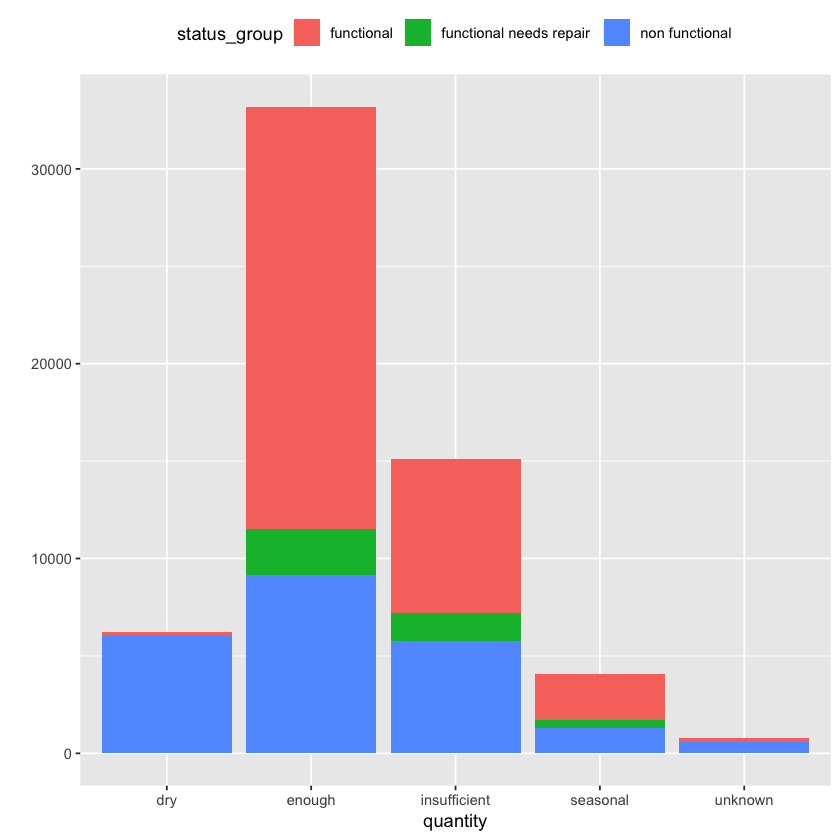

In [9]:
#Created bar plot for quantity
qplot(quantity, data = train, geom = 'bar', fill= status_group) + theme(legend.position = 'top')


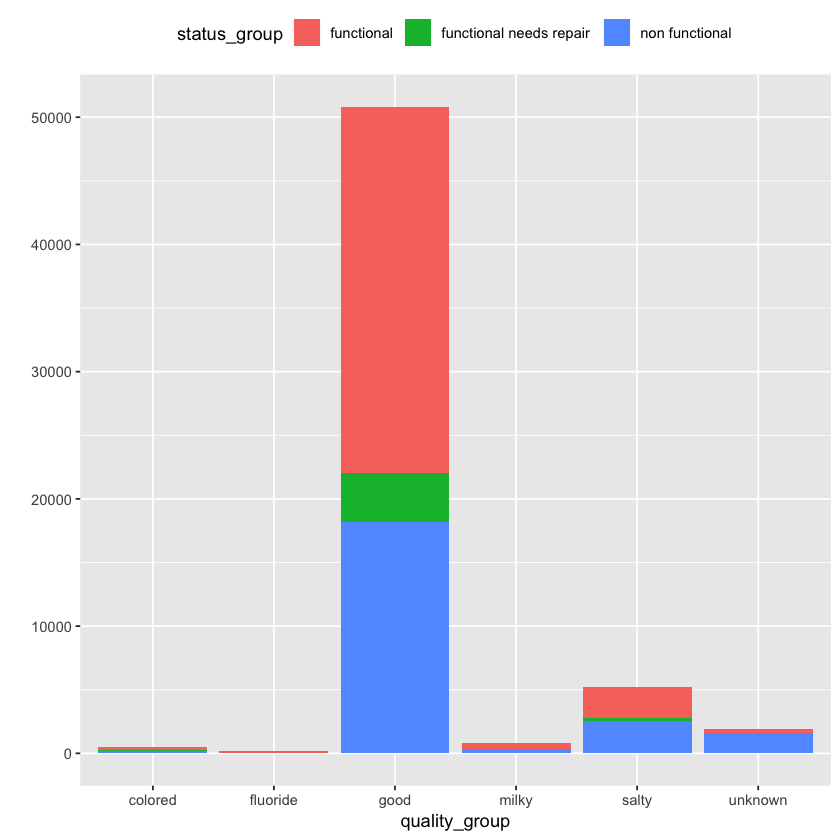

In [10]:
# Create bar plot for quality_group
qplot(quality_group, data = train, geom = 'bar', fill = status_group) + theme (legend.position = 'top')

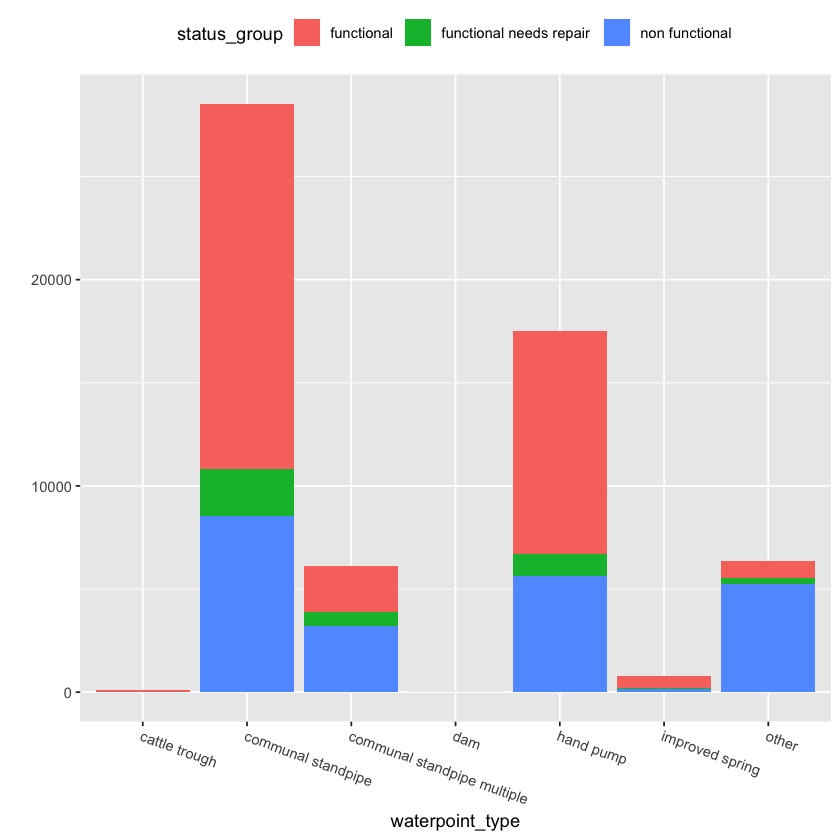

In [11]:
# Create bar plot for waterpoint_type

qplot(waterpoint_type, data = train, geom = 'bar', fill = status_group) + theme (legend.position = 'top') + 
theme (axis.text.x = element_text(angle = -20, hjust = 0))

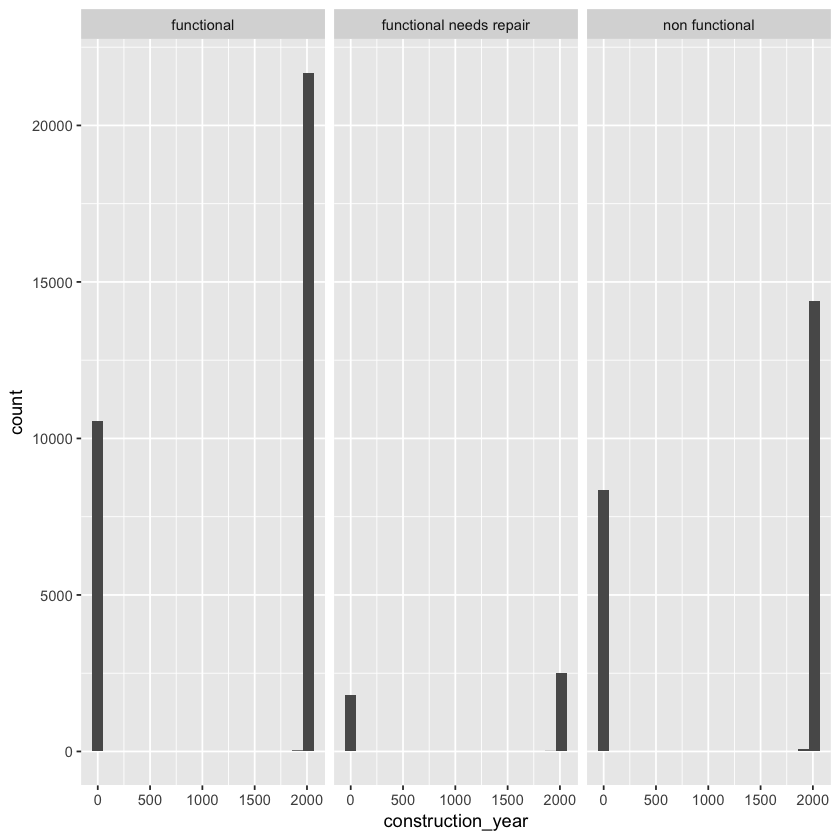

In [12]:
library(ggplot2)

# Create a histogram for 'construction_year' grouped by 'status_group'

ggplot (train, aes(x =construction_year)) + 
geom_histogram(bins = 20) +
facet_grid(~status_group)



In [13]:
# Now subseting when construction_year is larger than 0

ggplot (train, train$construction > 0, aes (x = construction_year)) + 
geom_histogram(bins = 20) + 
facet_wrap (~ status_group)

ERROR: Error: Mapping should be created with `aes() or `aes_()`.


In [ ]:
# Now subsetting when construction_year is larger than 0
ggplot(subset(train, construction_year > 0), aes(x = construction_year)) +
  geom_histogram(bins = 20) + 
  facet_grid( ~ status_group) +
theme (axis.text.x = element_text(angle = -90, hjust = 1))


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Creating a generic function for ‘toJSON’ from package ‘jsonlite’ in package ‘googleVis’

Welcome to googleVis version 0.6.3

Please read Google's Terms of Use
before you start using the package:
https://developers.google.com/terms/

Note, the plot method of googleVis will by default use
the standard browser to display its output.

See the googleVis package vignettes for more details,
or visit https://github.com/mages/googleVis.

To suppress this message use:
suppressPackageStartupMessages(library(googleVis))



ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 1000, 0


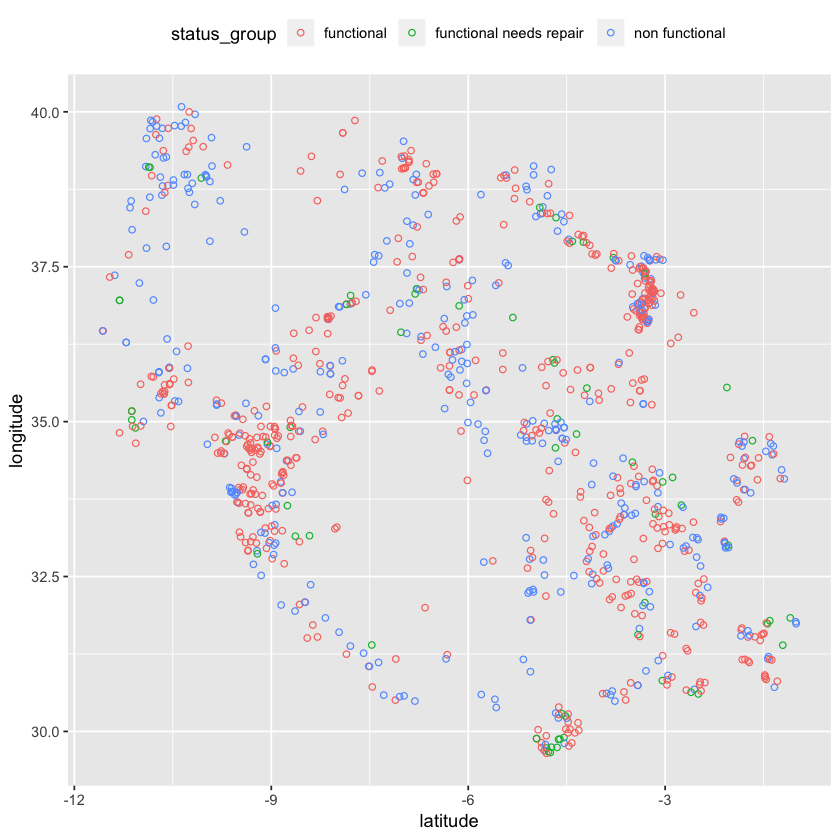

In [14]:
library(ggplot2)
install.packages('googleVis')
library(googleVis)

# Create scatter plot: latitude vs longitude with color as status_group
ggplot(subset(train[1:1000,], latitude < 0 & longitude > 0),
    aes(x = latitude, y = longitude, color = status_group)) + 
    geom_point(shape = 1) + 
    theme(legend.position = "top")

# Create a column 'latlong' to input into gvisGeoChart
train$latlong <- paste(round(train$latitude,2), round(train$longitude, 2), sep = ":")

# Use gvisGeoChart to create an interactive map with well locations
wells_map <- gvisGeoChart(train[1:1000,], locationvar = "latlong", 
                          colorvar = "status_group", sizevar = "Size", 
                          options = list(region = "TZ"))

# Plot wells_map
plot(wells_map)



## First Prediction


In [15]:
# Load the randomForest library
library(randomForest)

# Set seed and create a random forest classifier

set.seed(42)
model_forest <-randomForest(as.factor(status_group) ~ longitude + latitude + extraction_type_group + quality_group + quantity + waterpoint_type + construction_year,  data = train, importance = TRUE, ntree= 5, nodesize = 2)



randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [16]:

# Use random forest to predict the values in train
pred_forest_train <- predict(model_forest, train)

In [17]:
# Observe the first few rows of your predictions
head(pred_forest_train)

1              2              3              4              5 
    functional     functional     functional     functional non functional 
             6 
    functional 
Levels: functional functional needs repair non functional

In [22]:
install.packages('e1071', dependencies=TRUE)

also installing the dependencies ‘mlbench’, ‘SparseM’, ‘slam’

Warning message in install.packages("e1071", dependencies = TRUE):
“installation of package ‘mlbench’ had non-zero exit status”Warning message in install.packages("e1071", dependencies = TRUE):
“installation of package ‘SparseM’ had non-zero exit status”Warning message in install.packages("e1071", dependencies = TRUE):
“installation of package ‘slam’ had non-zero exit status”Warning message in install.packages("e1071", dependencies = TRUE):
“installation of package ‘e1071’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Evaluating the Random Forest


In [24]:
install.packages('caret', dependencies = TRUE)
library(caret)
confusionMatrix(pred_forest_train, train$status_group)

also installing the dependencies ‘haven’, ‘gdata’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘brglm’, ‘gtools’, ‘lme4’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘coin’, ‘BradleyTerry2’, ‘e1071’, ‘earth’, ‘fastICA’, ‘gam’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘party’, ‘pROC’, ‘proxy’, ‘RANN’, ‘subselect’, ‘Cubist’

Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘haven’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘minqa’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘RcppEigen’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘matrixStats’ had non-zero exit 

ERROR: Error: package e1071 is required


## Variable Importance



In [20]:
importance(model_forest)

,functional,functional needs repair,non functional,MeanDecreaseAccuracy,MeanDecreaseGini
longitude,9.695437,16.489961,40.148540,15.313203,4333.7869
latitude,27.289221,15.620617,41.806025,39.724028,4286.5836
extraction_type_group,7.988527,7.926244,15.631259,13.584418,1948.3207
quality_group,10.093434,5.783964,5.264050,9.931167,474.1197
quantity,58.959631,6.617483,34.479642,61.176109,4744.9167
waterpoint_type,9.697711,5.294336,8.586156,14.543322,2566.7375
construction_year,12.277514,12.460768,18.110957,25.405349,2224.2334


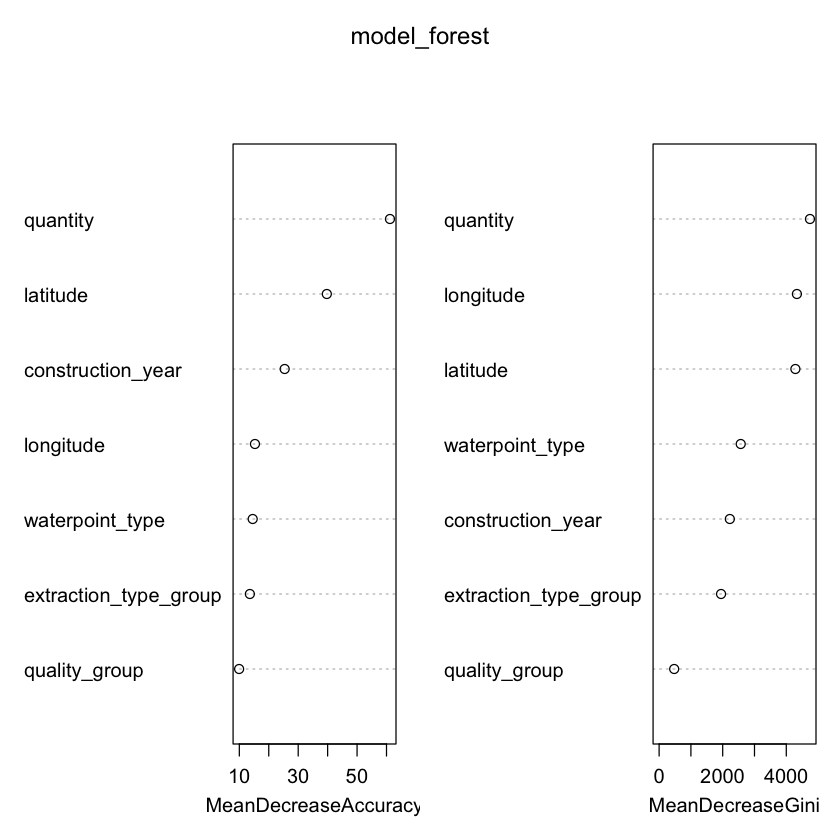

In [21]:
varImpPlot(model_forest)

## Predict, Submit and Next Steps

In [23]:
# randomForest and caret packages are pre-loaded
set.seed(42)
model_forest <- randomForest(as.factor(status_group) ~ longitude + latitude + extraction_type_group + quantity + waterpoint_type + construction_year + install_3,
                             data = train, importance = TRUE,
                             ntree = 5, nodesize = 2)

# Predict using the training values
pred_forest_train <- predict(model_forest, train)
importance(model_forest)
confusionMatrix(pred_forest_train, train$status_group)

# Predict using the test values
pred_forest_test <- predict(model_forest, test$status_group)

ERROR: Error in eval(predvars, data, env): object 'install_3' not found


In [27]:
head(test_values)

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,⋯,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,⋯,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,⋯,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,⋯,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,⋯,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,⋯,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,⋯,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [25]:
install.packages('e1071', dependencies=TRUE)

also installing the dependencies ‘mlbench’, ‘SparseM’, ‘slam’

Warning message in install.packages("e1071", dependencies = TRUE):
“installation of package ‘mlbench’ had non-zero exit status”Warning message in install.packages("e1071", dependencies = TRUE):
“installation of package ‘SparseM’ had non-zero exit status”Warning message in install.packages("e1071", dependencies = TRUE):
“installation of package ‘slam’ had non-zero exit status”Warning message in install.packages("e1071", dependencies = TRUE):
“installation of package ‘e1071’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [26]:
# randomForest and caret packages are pre-loaded
set.seed(42)
model_forest <- randomForest(as.factor(status_group) ~ longitude + latitude + extraction_type_group + quantity + waterpoint_type + construction_year + install_3,
                             data = train, importance = TRUE,
                             ntree = 5, nodesize = 2)

# Predict using the training values
pred_forest_train <- predict(model_forest, train)
importance(model_forest)
confusionMatrix(pred_forest_train, train$status_group)

# Predict using the test values
pred_forest_test <- predict(model_forest, test)

# Create submission data frame
submission <- data.frame(test$id)
submission$status_group <- pred_forest_test
names(submission)[1] <- "id"



ERROR: Error in eval(predvars, data, env): object 'install_3' not found
